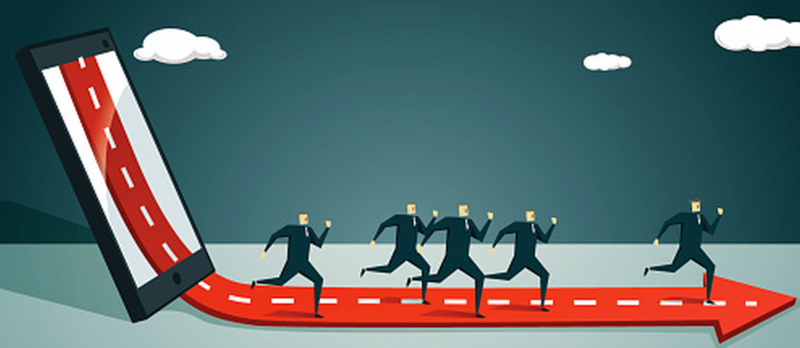

## Telecom Churn Case Study

Assume that you have just landed into a great analytical job with "TeraPhone", one of the largest telecommunication company in India. They have a major problem in their internet data business with the consumers of these data services. Its becoming incresingly difficult to acquire new customers due to tarrif wars in the data packages offerings. Since the market is becoming saturated , the huge growth is tapered off. Companies are now engaged in battles to attract each other's customers while retaining their own. Customer switching from one company to another is called "churn" and it is expensive : company must spend on incentives to attract a customer while another company loses revenue when the customer departs. <br>

You have been called to help understand the problem and to devise a solution. Attracting new customers in much more expensive than retaining existing ones, so a good deal of marketing budget is allocated to prevent churn. Marketing team has already designed a special retention offer. Your task is to devise a solution, step-by-step plan for how the data science team should use "TeraPhone"s vast data resources to decide which customers should be offered the special retention deal prior to the expiration of their current plans. <br>

For that matter three different data files are made available to you. First one containing the profile information of the customers. The second one containing the data about the internet usage of the customers. The third one containing the data about the churn done by the customers. With 21 predictor variables you need to predict whether a particular customer will switch to another telecom provider or not. 

### 1. Importing and Merging Data                                                                                    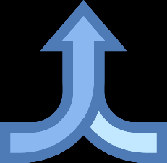

### 1.1 Import the datasets

The customer data, internet usage data and churn data needs to be imported into the enviornment to process it further to predict whether a customer will switch the service provider or not. Let's import that data using the Pandas.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

In [3]:
# Importing all datasets
churn_data = pd.read_csv("churn_data.csv")
customer_data = pd.read_csv("customer_data.csv")
internet_data = pd.read_csv("internet_data.csv")

### 1.2 Merge the datasets

All these datasets have customerID in common, so that can be used to join all these three datasets together. 

In [4]:
# Merge on 'customerID' column & have a look at first five records of the merged dataset
df= pd.merge(churn_data, customer_data, how='inner', on='customerID')
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


This merged dataset needs to be join with internet dataset so that we can have a final joined version of the data.

In [5]:
# Merge on 'customerID' column & have a look at first five records of the merged dataset
#Final dataframe with all predictor variables
telecom = pd.merge(df, internet_data, how='inner', on='customerID')
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


Lets figure out the rows and columns present in the dataframe.

In [6]:
len(telecom)

7043

In [7]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

### 2. Let's understand the structure of telecom dataframe                      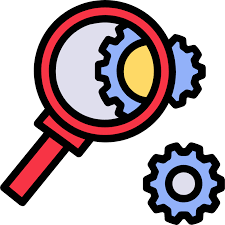

### 2.1 Get First (and Last) rows

Lets have a look at the first (and last) five records of the dataframe.

In [8]:
telecom.head()
#telecom.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [9]:
telecom.tail()
#telecom.tail(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Male,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Female,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,...,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Male,...,Yes,No,Yes,Fiber optic,No,No,No,No,No,No
7042,3186-AJIEK,66,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,Male,...,No,No,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes


There are 21 variables present in the master dataframe.

### 2.2 Look at the datatypes of the columns

Analyse the type of the data made available. 

In [10]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

In [11]:
#telecom.dtypes

Lets see some interesting statistics about the numeric columns present in the dataset.

In [12]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


### 3. Data Preparation                                                            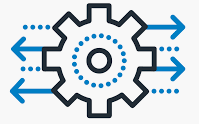

### 3.1 Data Transformation 

Columns like 'PhoneService', 'PaperlessBilling', 'Churn', 'Partner' and 'Dependents' contains only 'Yes' and 'No' values. As we are going for Ligistic regression afterwards better to convert them to the numbers. All 'Yes' values to 1 and 'No' to 0.

In [13]:
# Converting Yes to 1 and No to 0
telecom['PhoneService'] = telecom['PhoneService'].map({'Yes': 1, 'No': 0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes': 1, 'No': 0})
telecom['Churn'] = telecom['Churn'].map({'Yes': 1, 'No': 0})
telecom['Partner'] = telecom['Partner'].map({'Yes': 1, 'No': 0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes': 1, 'No': 0})

In [14]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


### 3.2 Dummy Variable Creation

As Logisitic regression needs to tried out, all the columns needs to be present in the numeric format. Categorical variables having discrete values needs to be converted first into dummy variables. For example, if a column "Contract" has three types of the values like 'Month-to-month', 'One year', and 'Two year' then , dummy variable creation will result into three different variables i.e. one for each contract value. These three states can be represented only with two columns hence we can drop one of the dummy columns without missing any information.

In [15]:
# Contract has three discrete values
telecom['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [16]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
contract = pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,contract],axis=1)

Lets check column list , two more columns 'Contract_One year', 'Contract_Two year'are added into the dataframe.

In [17]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract_One year',
       'Contract_Two year'],
      dtype='object')

Lets repeat the same exercise for the other categorical columns as well. 

In [18]:
# Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
pm = pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,pm],axis=1)

# Creating a dummy variable for the variable 'gender' and dropping the first one.
gen = pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,gen],axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and dropping the first one.
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
#  dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1],axis=1)

# Creating a dummy variable for the variable 'InternetService' and dropping the first one.
iser = pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,iser],axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
os1= os.drop(['OnlineSecurity_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,os1],axis=1)

# Creating a dummy variable for the variable 'OnlineBackup'.
ob =pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob1 =ob.drop(['OnlineBackup_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1],axis=1)

# Creating a dummy variable for the variable 'DeviceProtection'. 
dp =pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1],axis=1)

# Creating a dummy variable for the variable 'TechSupport'. 
ts =pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1],axis=1)

# Creating a dummy variable for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,st1],axis=1)

# Creating a dummy variable for the variable 'StreamingMovies'. 
sm =pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1],axis=1)

In [19]:
#telecom['MultipleLines'].value_counts()

Lets check column list to have look at dummy variable created.

In [20]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

### 3.3 Dropping the repeated variables

As the dummy variables are created out of the categorical attributes then those can be removed out from the dataset.

In [21]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [22]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner',
       'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

### 3.4 Data conversion 

Some of the variables are imported as objects but by looking at the actual values those are number attributes. Such attributes needs to formatted to the numeric columns.

In [23]:
#The TotalCharges varaible was imported as a object we need to convert it to float
telecom['TotalCharges'] =telecom['TotalCharges'].convert_objects(convert_numeric=True)

In [24]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
Contract_One year                        7043 non-null uint8
Contract_Two year                        7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check        

### 3.5 Dropping the unnecessary variables

The variable 'customerID' as such now going to play any role in our further analysis. So lets remove it.

In [25]:
telecom = telecom.drop(['customerID'], 1)

Now we can see we have all variables as integer.

### 3.6 Checking for Outliers

Lets have a look at the values of continuous variables to check if their are some unusual variations seen within their values.

In [26]:
# Checking for outliers in the continuous variables
numeric_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [27]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
numeric_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliner in the data. The numbers are gradually increasing.

### 3.7 Checking for Missing Values and Inputing Them

its quite possible that some values are missing in the dataset. Lets have a check on it. 

In [28]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_No                          0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                           0
OnlineBackup_Yes                

11 records does not have any value specified for the 'TotalCharges' attribute.

In [29]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                       0.00
OnlineBackup_No                   

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [30]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [31]:
#Check the count of rows to see if missing records are actually removed
len(telecom)

7032

In [32]:
# Checking percentage of missing values after removing the missing values
#round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

Now we don't have any missing values

### 3.8 Feature Standardisation

The continuous features needs to be brought on a particular scale. Lets use standard normalization (Z-score Normalization) method to do it. 

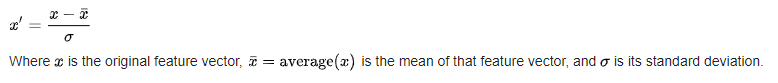

In [33]:
# Normalising continuous features
cont_df = telecom[['tenure','MonthlyCharges','TotalCharges']]

In [34]:
normalized_df=(cont_df-cont_df.mean())/cont_df.std()

In [35]:
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'], 1)

In [36]:
telecom = pd.concat([telecom,normalized_df],axis=1)

In [37]:
telecom.head()

,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,0,0,1,...,0,1,0,1,0,1,0,-1.280157,-1.161611,-0.994123
1,1,0,0,0,0,0,1,0,0,0,...,1,1,0,1,0,1,0,0.064298,-0.260859,-0.173727
2,1,1,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239416,-0.363897,-0.959581
3,0,0,0,0,0,0,1,0,0,0,...,1,0,1,1,0,1,0,0.512450,-0.747797,-0.195234
4,1,1,1,0,0,0,0,0,0,1,...,0,1,0,1,0,1,0,-1.239416,0.196164,-0.940391


# 3.9 Checking the Churn Rate

Lets compute the actual churn rate now

In [38]:
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100

In [39]:
churn

26.578498293515356

We have almost 27% churn rate

## 4. Model Building                                                                              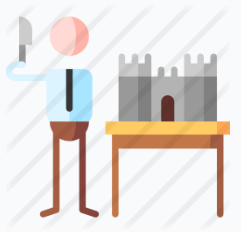
Let's start by splitting our data into a training set and a test set.

### 4.1 Splitting Data into Training and Test Sets

For building the logistic regression model, part of the telecom dataset needs to be used and remaining part needs to be used for the model validation. For that purpose, the whole dataset needs to be divided into "train" and "test" datasets. Also 
the outcome variable is 'Churn' which needed into a separate data structure. 

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Putting feature variable to X
X = telecom.drop(['Churn'],axis=1)

# Putting response variable to y
y = telecom['Churn']

In [42]:
X.head()

,PhoneService,PaperlessBilling,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,0,1,0,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,-1.280157,-1.161611,-0.994123
1,1,0,0,0,0,1,0,0,0,1,...,1,1,0,1,0,1,0,0.064298,-0.260859,-0.173727
2,1,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,1,0,-1.239416,-0.363897,-0.959581
3,0,0,0,0,0,1,0,0,0,0,...,1,0,1,1,0,1,0,0.512450,-0.747797,-0.195234
4,1,1,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,-1.239416,0.196164,-0.940391


In [43]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [44]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

Lets sett the number of records in train and test datasets.

In [45]:
len(X_train)

4922

In [46]:
len(y_train)


4922

In [47]:
len(X_test)

2110

In [48]:
len(y_test)

2110

### 4.2 Running Your First Training Model

Lets build a logistic regression model using the training dataset with the help of the 'statsmodels' packages. 

In [49]:
import statsmodels.api as sm

In [50]:
# Logistic regression model
log_model1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Wed, 25 Mar 2020   Deviance:                       4009.4
Time:                        11:20:56   Pearson chi2:                 6.07e+03
No. Iterations:                    18   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2783      1.187     -2.762      0.006      -5.605      -0.952
PhoneService                              0.8213      0.588      1.396      0.163      -0.332       1.974
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_No                          0.1295      0.205      0.632      0.527      -0.272       0.531
MultipleLines_Yes                         0.6918      0.392      1.763      0.078      -0.077       1.461
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -3.4348      1.324     -2.594      0.009      -6.030      -0.839
OnlineSecurity_No                         0.0905      0.058      1.558      0.119      -0.023       0.204
OnlineSecurity_Yes                        0.0660      0.174      0.380      0.704      -0.275       0.407
OnlineBackup_No                          -0.0088      0.055     -0.161      0.872      -0.116       0.098
OnlineBackup_Yes                          0.1653      0.172      0.960      0.337      -0.172       0.503
DeviceProtection_No                      -0.0832      0.056     -1.487      0.137      -0.193       0.026
DeviceProtection_Yes                      0.2397      0.174      1.379      0.168      -0.101       0.580
TechSupport_No                            0.0935      0.058      1.604      0.109      -0.021       0.208
TechSupport_Yes                           0.0630      0.174      0.362      0.717      -0.278       0.404
StreamingTV_No                           -0.4016      0.133     -3.027      0.002      -0.662      -0.142
StreamingTV_Yes                           0.5581      0.267      2.094      0.036       0.036       1.081
StreamingMovies_No                       -0.3459      0.133     -2.609      0.009      -

### 4.3 Correlation Analysis

Before moving further lets see what kind of relationship exists between the variables of the dataset. 

In [51]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

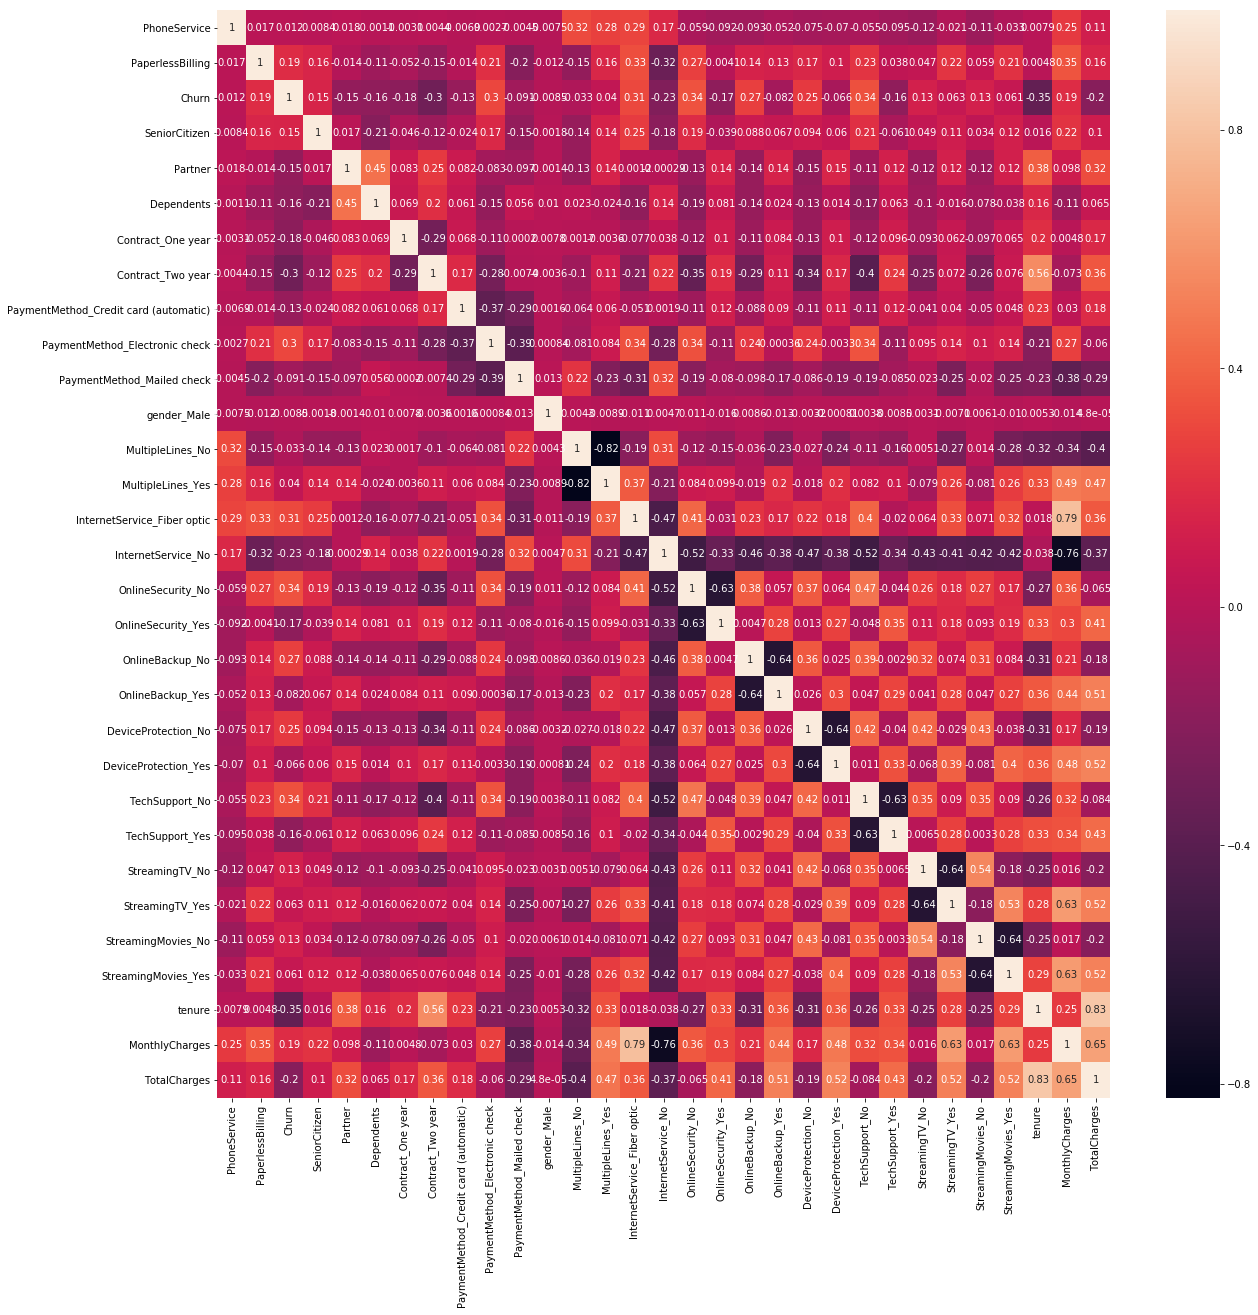

In [52]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)

### 4.3.1 Dropping highly correlated variables

The main result of a correlation is called the correlation coefficient (or "r"). It ranges from -1.0 to +1.0. The closer r is to +1 or -1, the more closely the two variables are related.

If r is close to 0, it means there is no relationship between the variables. If r is positive, it means that as one variable gets larger the other gets larger. If r is negative it means that as one gets larger, the other gets smaller (often called an "inverse" correlation).

Lets get rid of the variables which are correlated with each other from the training data.

In [53]:
X_test2 = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)
X_train2 = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)

### 4.3.2 Checking the Correlation Matrix again

After dropping highly correlated variables now let's check the correlation matrix again.

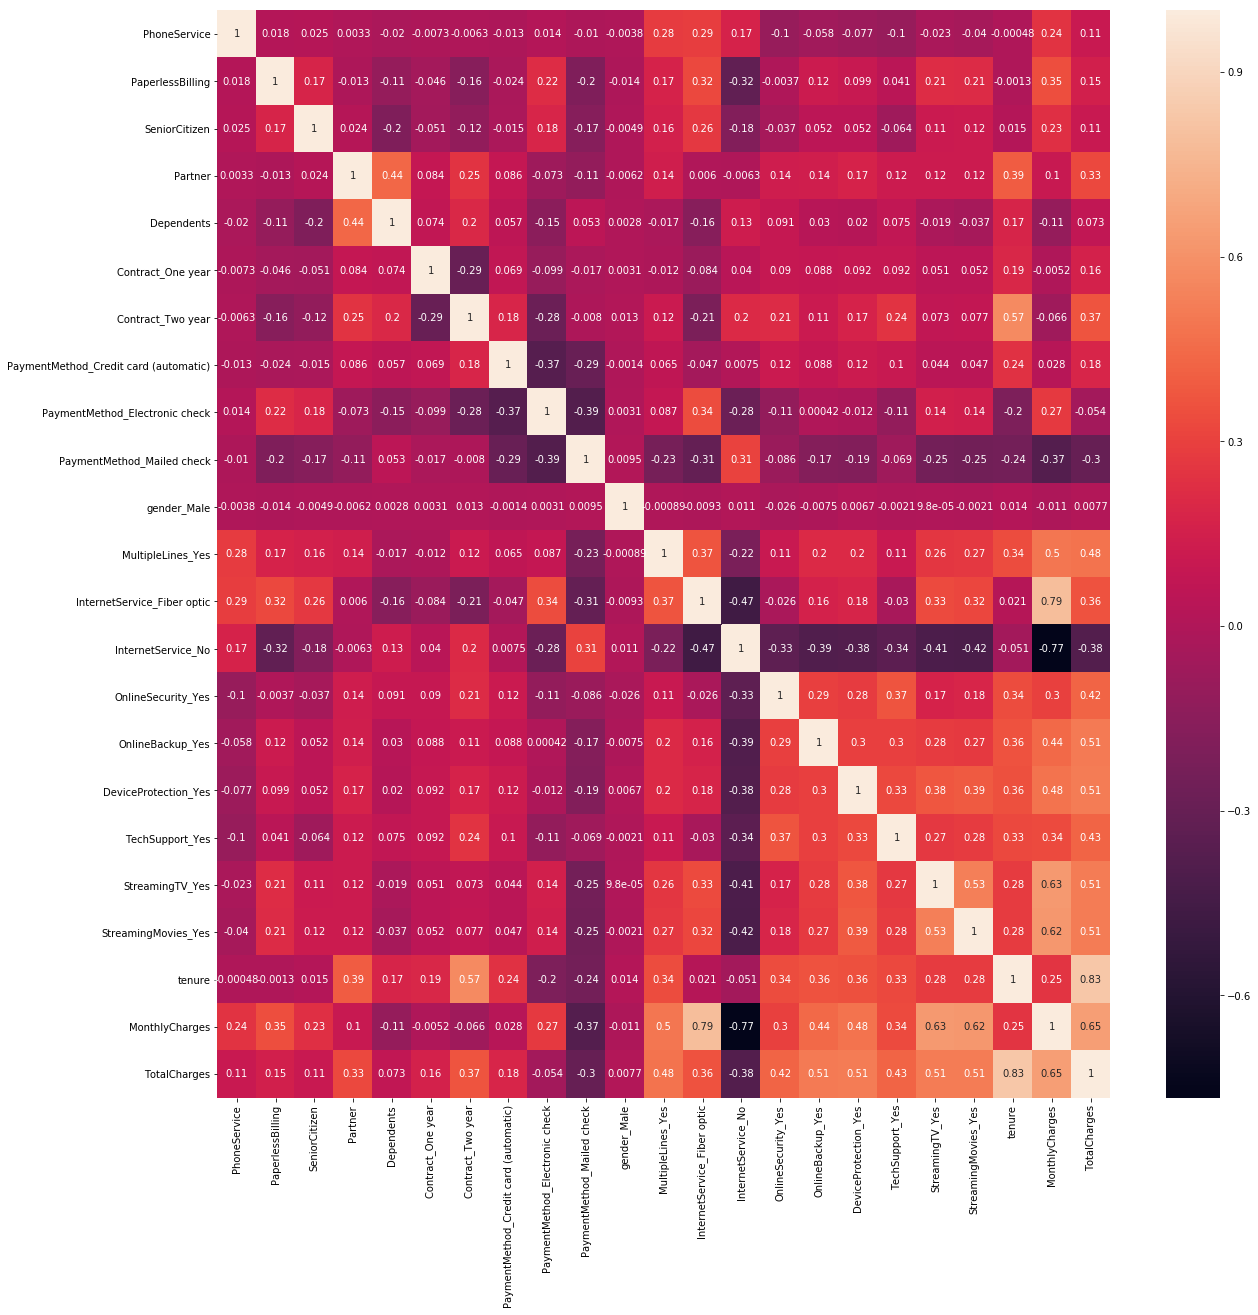

In [54]:
plt.figure(figsize = (20,20))
sns.heatmap(X_train2.corr(),annot = True)

### 4.3.3 Rebuilding the Model

Now let's run our model again after dropping highly correlated variables

In [55]:
log_model2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
log_model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Wed, 25 Mar 2020   Deviance:                       4009.4
Time:                        11:21:18   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9338      1.545     -2.545      0.011      -6.963      -0.905
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
tenure                                   -1.5198      0.190     -8.015      0.000      -1.891      -1.148
MonthlyCharges                           -2.1817      1.160     -1.880      0.060      -4.456       0.092
TotalCharges                              0.7329      0.198      3.705      0.000       0.345       1.121
=========================================================================================================
"""

### 4.4 Feature Selection Using RFE (Recursive Feature Elimination)

Recursive Feature Elimination (RFE) as its name suggests recursively removes features, builds a model using the remaining attributes and calculates model accuracy. RFE is able to work out the combination of attributes that contribute to the prediction on the target variable (or class). 

Scikit Learn does most of the heavy lifting just import RFE from sklearn.feature_selection and pass any classifier model to the RFE() method with the number of features to select. 

In [56]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(log_reg, 13)        # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
#print(rfe.ranking_)           # Printing the ranking

[ True  True False False False  True  True False  True False False  True
 False  True  True False  True False False False False False  True False
 False  True False  True False  True]


### 4.4.1 Building the Model using the features suggested by RFE

In [57]:
# Variables selected by RFE 
col = ['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [58]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
log_model_rfe = LogisticRegression()
log_model_rfe.fit(X_train[col], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### 4.4.2 Building model again using stat model package with features selected by RFE

In [59]:
#Comparing the model with StatsModels
log_model3 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
log_model3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2024.2
Date:                Wed, 25 Mar 2020   Deviance:                       4048.4
Time:                        11:21:28   Pearson chi2:                 6.19e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.0162      0.169     -6.017      0.000      -1.347      -0.685
PhoneService                      -0.3090      0.173     -1.784      0.074      -0.648       0.030
PaperlessBilling                   0.3595      0.089      4.029      0.000       0.185       0.534
Contract_One year                 -0.7012      0.127     -5.516      0.000      -0.950      -0.452
Contract_Two year                 -1.3187      0.210     -6.271      0.000      -1.731      -0.907
PaymentMethod_Electronic check     0.3668      0.083      4.446      0.000       0.205       0.529
MultipleLines_No                  -0.2311      0.095     -2.435      0.015      -0.417      -0.045
InternetService_Fiber optic        0.7937      0.116      6.836      0.000       0.566       1.021
InternetService_No                -1.1832      0.182     -6.484      0.000      -1.541      -0.826
OnlineSecurity_Yes                -0.4107      0.102     -4.031      0.000      -0.610      -0.211
TechSupport_Yes                   -0.4181      0.101     -4.135      0.000      -0.616      -0.220
StreamingMovies_No                -0.2024      0.094     -2.160      0.031      -0.386      -0.019
tenure                            -1.4974      0.181     -8.251      0.000      -1.853      -1.142
TotalCharges                       0.7373      0.186      3.965      0.000       0.373       1.102
==================================================================================================
"""

### 4.5 Computing VIF (Variance Inflation Factor) values of features

Colinearity is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. To detect colinearity among variables, simply create a correlation matrix and find variables with large absolute values. 

Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear.

The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

Steps for Implementing VIF
- Run a multiple regression.
- Calculate the VIF factors.
- Inspect the factors for each predictor variable, if the VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable.

Let's write a function that helps us to compute the VIF values of features.

In [60]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [61]:
telecom.columns
['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

['PhoneService',
 'PaperlessBilling',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
 'MultipleLines_No',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_Yes',
 'TechSupport_Yes',
 'StreamingMovies_No',
 'tenure',
 'TotalCharges']

In [62]:
# Calculating Vif value
vif_cal(input_data=telecom.drop(['SeniorCitizen', 'Partner', 'Dependents',
                                 'PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check',
                                 'gender_Male','MultipleLines_Yes','OnlineSecurity_No','OnlineBackup_No',
                                 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
                                 'TechSupport_No','StreamingTV_No','StreamingTV_Yes','StreamingMovies_Yes',
                                 'MonthlyCharges'], axis=1), dependent_col='Churn')

,Var,Vif
0,PhoneService,10.87
12,TotalCharges,8.58
11,tenure,6.80
1,PaperlessBilling,2.61
7,InternetService_No,0.65
3,Contract_Two year,0.28
2,Contract_One year,0.24
9,TechSupport_Yes,0.24
8,OnlineSecurity_Yes,0.21
10,StreamingMovies_No,0.19


### 4.5.1 Dropping Variable with high VIF

Now we should drop the variables showing multicolliniarity behaviour.

In [63]:
col = ['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No']

### 4.5.2 Building the model after dropping the variable with high VIF

In [64]:
log_model5 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
log_model5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4911
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2126.4
Date:                Wed, 25 Mar 2020   Deviance:                       4252.8
Time:                        11:21:41   Pearson chi2:                 4.91e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.7240      0.129     -5.629      0.000      -0.976      -0.472
PaperlessBilling                   0.2819      0.087      3.248      0.001       0.112       0.452
Contract_One year                 -1.3894      0.114    -12.142      0.000      -1.614      -1.165
Contract_Two year                 -2.3813      0.190    -12.533      0.000      -2.754      -2.009
PaymentMethod_Electronic check     0.4391      0.080      5.501      0.000       0.283       0.596
MultipleLines_No                   0.0407      0.080      0.508      0.612      -0.116       0.198
InternetService_Fiber optic        0.6579      0.088      7.451      0.000       0.485       0.831
InternetService_No                -1.2552      0.169     -7.430      0.000      -1.586      -0.924
OnlineSecurity_Yes                -0.5965      0.098     -6.109      0.000      -0.788      -0.405
TechSupport_Yes                   -0.4757      0.097     -4.883      0.000      -0.667      -0.285
StreamingMovies_No                -0.1224      0.085     -1.441      0.150      -0.289       0.044
==================================================================================================
"""

### 4.5.3 Building the model after dropping the variable with high VIF using sklearn 

In [65]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
log_model_sk = LogisticRegression()
log_model_sk.fit(X_train[col], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### 5. Model evaluation                                                              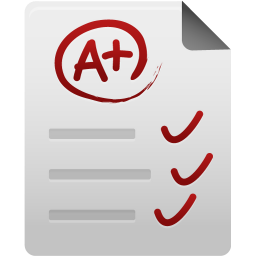

Lets utilise this final model to see how it performs the task of prediction with test data.

### 5.1  Make Predictions with test data

Predict the outcomes using the "log_model_sk" model created in earlier step. It will provide the probablities as outcomes i.e. chances that customer will switch the provider or not.

In [66]:
# Predicted probabilities
y_pred = log_model_sk.predict_proba(X_test[col])

# [probability_of_0(no), probability_of_1(yes)]
y_pred

array([[0.43983279, 0.56016721],
       [0.44924185, 0.55075815],
       [0.9818703 , 0.0181297 ],
       ...,
       [0.9818703 , 0.0181297 ],
       [0.59080509, 0.40919491],
       [0.98625095, 0.01374905]])

### 5.2  Make Results readable

The result is shown as numpy array for all the test records. Lets convert it into columnar format to make it more readable.

In [67]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.head()

,0,1
0,0.439833,0.560167
1,0.449242,0.550758
2,0.981870,0.018130
3,0.467813,0.532187
4,0.985725,0.014275


In [68]:
# Converting to column dataframe, just focussing on probability_of_1 , as probability_of_0 = 1 - probability_of_1
y_pred_df_mod = y_pred_df.iloc[:,[1]]
y_pred_df_mod.head()

,1
0,0.560167
1,0.550758
2,0.018130
3,0.532187
4,0.014275


Lets bring y_test into a data frame format so that it can be easily compared with the y_pred that we got in earlier step.

In [69]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [70]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [71]:
# Removing index for both dataframes to append them side by side 
y_pred_df_mod.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

Merge the y_pred data frame with y_test data frame.

In [72]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_df_mod],axis=1)
y_pred_final.head()

,Churn,CustID,1
0,0,942,0.560167
1,1,3730,0.550758
2,0,1761,0.018130
3,1,2283,0.532187
4,0,1872,0.014275


In [73]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_pred_final.head()

,Churn,CustID,Churn_Prob
0,0,942,0.560167
1,1,3730,0.550758
2,0,1761,0.018130
3,1,2283,0.532187
4,0,1872,0.014275


In [74]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.560167
1,3730,1,0.550758
2,1761,0,0.018130
3,2283,1,0.532187
4,1872,0,0.014275


In [75]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [76]:
# Let's see the head
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,942,0,0.560167,1
1,3730,1,0.550758,1
2,1761,0,0.018130,0
3,2283,1,0.532187,1
4,1872,0,0.014275,0


### 5.3 Compute model performance metrics

### 5.3.1 Confusion matrix

Lets compute confusion matrix to evaluate the accuracy of a classification. <br>
By definition a confusion matrix  is such that  is equal to the number of observations known to be in group  but predicted to be in group .Thus in binary classification, the count of true negatives is C(0,0), false negatives is C(1,0), true positives is  C(1,1) and false positives is C(0,1).

In [77]:
# Predicted     not_churn    churn
# Actual
# not_churn        TN        FP
# churn            FN        TP 

In [78]:
#help(metrics.confusion_matrix)

In [79]:
from sklearn import metrics

In [80]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[1336,  192],
       [ 282,  300]], dtype=int64)

In [81]:
# Predicted     not_churn    churn
# Actual
# not_churn        1336      192
# churn            282       300  

### 5.3.2 Overall Accuracy

Let's check the overall accuracy.

In [82]:
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.predicted)

0.7753554502369668

Model did good on this accuracy measure i.e. 77.5% are correct predictions done by model.

### 5.3.3 Computing other measures

Lets analyse what are the other important measures that can be obtained and interpreted from the confusion matrix. 
They are 

- True Negatives (actual false, model also predicted false)
- True Positives  (actual true, model also predicted true)
- False Positives (actual false, model predicted true)
- False Negatives (actual true, model predicted false)

In [83]:
TN = confusion[0,0] # true negatives
TP = confusion[1,1] # true positives 

FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

### 5.3.3.1 Accuracy again

Accuracy can be obtained by comparing the correct predictions made against the total number of preditions.

In [84]:
accuracy = (TP + TN ) / (TP + TN + FP + FN)
accuracy

0.7753554502369668

Same accuracy results obtained with actual calculations.

### 5.3.3.2 Sensitivity (TPR / Recall)

Sensitivity (also called the true positive rate, or the recall in some fields) measures the proportion of actual positives which are correctly identified as such (e.g., the percentage of customers who actually have switched the provider), and is complementary to the false negative rate. <br>
Sensitivity= true positives/(true positive + false negative)

In [85]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
sensitivity

0.5154639175257731

### 5.3.3.3 Specificity (TNR) 

Specificity (also called the true negative rate) measures the proportion of negatives which are correctly identified as such (e.g., the percentage of customers who actually have not switched the provider), and is complementary to the false positive rate. <br>
Specificity=true negatives/(true negative + false positives)

In [ ]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

### 5.3.3.4 False Postive Rate (FPR)

False postive rate tells how often we made positive prediction when vthe cases were not positive - i.e. predicting churn when customer does not have churned

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
FPR = print(FP/ float(TN+FP))
FPR

### 5.4 ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [ ]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

### 5.5 Finding Optimal Cutoff Point 

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity. Lets try to iterate over the different probability values as cutoff points for the decision.

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

Lets compute the accuracy measures for these different probability values.

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob_value','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
prob_values = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in prob_values:
    conf_matrix = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final[i] )
    total1 = sum( sum(conf_matrix ))
    accuracy =  ( conf_matrix[0,0] + conf_matrix[1,1] ) / total1
    sensitivity = conf_matrix[0,0] / ( conf_matrix[0,0] + conf_matrix[0,1] )
    specificity = conf_matrix[1,1] / ( conf_matrix[1,0] + conf_matrix[1,1] )
    cutoff_df.loc[i] =[ i , accuracy, sensitivity, specificity]
print(cutoff_df)

Analyze it visually.

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob_value', y=['accuracy','sensitivity','specificity'])

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

In [ ]:
y_pred_final.head()

Lets compute the accuracy again.

In [ ]:
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.final_predicted)

Models accuracy changed a bit! Now getting 72%. But if we are happy with this accuracy score, can use it for the real time predictions further!